##Load Data

In [ ]:
!nvidia-smi

Sat Aug 31 10:28:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Copy datasets
!cp /content/drive/MyDrive/Datasets/Datasets2.zip .

In [ ]:
!unzip '/content/Datasets2.zip' -d '/content/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/Datasets2/Apple_Red/A3 (351).jpg  
  inflating: /content/Datasets2/Apple_Red/A3 (352).jpg  
  inflating: /content/Datasets2/Apple_Red/A3 (353).jpg  
  inflating: /content/Datasets2/Apple_Red/A3 (354).jpg  
  inflating: /content/Datasets2/Apple_Red/A3 (355).jpg  
  inflating: /content/Datasets2/Apple_Red/A3 (356).jpg  
  inflating: /content/Datasets2/Apple_Red/A3 (357).jpg  
  inflating: /content/Datasets2/Apple_Red/A3 (358).jpg  
  inflating: /content/Datasets2/Apple_Red/A3 (359).jpg  
  inflating: /content/Datasets2/Apple_Red/A3 (36).jpg  
  inflating: /content/Datasets2/Apple_Red/A3 (360).jpg  
  inflating: /content/Datasets2/Apple_Red/A3 (361).jpg  
  inflating: /content/Datasets2/Apple_Red/A3 (362).jpg  
  inflating: /content/Datasets2/Apple_Red/A3 (363).jpg  
  inflating: /content/Datasets2/Apple_Red/A3 (364).jpg  
  inflating: /content/Datasets2/Apple_Red/A3 (365).jpg  
  inflating: /content/Datasets2/Apple_

In [ ]:
import os
os.rename('/content/Datasets2','/content/Datasets')

In [ ]:
#Count data
import os

# Define the paths to the directories
Apple_Red_dir = "/content/Datasets/Apple_Red"
Cherry_dir = "/content/Datasets/Cherry"
Grape_Blue_dir = "/content/Datasets/Grape_Blue"
Peach_dir = "/content/Datasets/Peach"
Pear_dir = "/content/Datasets/Pear"

# Use the os module to count the number of files in each directory
Apple_Red_count = len(os.listdir(Apple_Red_dir))
Cherry_count = len(os.listdir(Cherry_dir))
Grape_Blue_count = len(os.listdir(Grape_Blue_dir))
Peach_count = len(os.listdir(Peach_dir))
Pear_count = len(os.listdir(Pear_dir))

# Print the results
print(f"Number of files in {Apple_Red_dir}: {Apple_Red_count}")
print(f"Number of files in {Cherry_dir}: {Cherry_count}")
print(f"Number of files in {Grape_Blue_dir}: {Grape_Blue_count}")
print(f"Number of files in {Peach_dir}: {Peach_count}")
print(f"Number of files in {Pear_dir}: {Pear_count}")


Number of files in /content/Datasets/Apple_Red: 1413
Number of files in /content/Datasets/Cherry: 1230
Number of files in /content/Datasets/Grape_Blue: 984
Number of files in /content/Datasets/Peach: 1230
Number of files in /content/Datasets/Pear: 1403


In [ ]:
num_Apple_Red = round(Apple_Red_count*.15)
num_Cherry = round(Cherry_count*.15)
num_Grape_Blue = round(Grape_Blue_count*.15)
num_Peach = round(Peach_count*.15)
num_Pear = round(Pear_count*.15)

print(f"Validate for fiber : {num_Apple_Red}")
print(f"Validate for fiber : {num_Cherry}")
print(f"Validate for fiber : {num_Grape_Blue}")
print(f"Validate for fiber : {num_Peach}")
print(f"Validate for fiber : {num_Pear}")

Validate for fiber : 212
Validate for fiber : 184
Validate for fiber : 148
Validate for fiber : 184
Validate for fiber : 210


In [ ]:
import os
import random

# Define the paths to the source and test directories
source_dir = "/content/Datasets"
test_dir = "/content/test"

val_ratio = 0.2

# Define the number of files to select for each test category
num_Apple_Red = round(Apple_Red_count*val_ratio)
num_Cherry = round(Cherry_count*val_ratio)
num_Grape_Blue = round(Grape_Blue_count*val_ratio)
num_Peach = round(Peach_count*val_ratio)
num_Pear = round(Pear_count*val_ratio)

# Define the paths to the source directories for each test category
Apple_Red_dir = os.path.join(source_dir, "Apple_Red")
Cherry_dir = os.path.join(source_dir, "Cherry")
Grape_Blue_dir = os.path.join(source_dir, "Grape_Blue")
Peach_dir = os.path.join(source_dir, "Peach")
Pear_dir = os.path.join(source_dir, "Pear")

# Define the paths to the test directories for each test category
Apple_Red_test_dir = os.path.join(test_dir, "Apple_Red")
Cherry_test_dir = os.path.join(test_dir, "Cherry")
Grape_Blue_test_dir = os.path.join(test_dir, "Grape_Blue")
Peach_test_dir = os.path.join(test_dir, "Peach")
Pear_test_dir = os.path.join(test_dir, "Pear")

# Create the test directories if they don't already exist
os.makedirs(Apple_Red_test_dir, exist_ok=True)
os.makedirs(Cherry_test_dir, exist_ok=True)
os.makedirs(Grape_Blue_test_dir, exist_ok=True)
os.makedirs(Peach_test_dir, exist_ok=True)
os.makedirs(Pear_test_dir, exist_ok=True)

# Set the random seed for reproducibility
random.seed(42)

# Randomly select files from each source directory and move them to the corresponding test directory
Apple_Red_files = random.sample(os.listdir(Apple_Red_dir), num_Apple_Red)
for f in Apple_Red_files:
    src_file = os.path.join(Apple_Red_dir, f)
    dst_file = os.path.join(Apple_Red_test_dir, f)
    os.rename(src_file, dst_file)

Cherry_files = random.sample(os.listdir(Cherry_dir), num_Cherry)
for f in Cherry_files:
    src_file = os.path.join(Cherry_dir, f)
    dst_file = os.path.join(Cherry_test_dir, f)
    os.rename(src_file, dst_file)

Grape_Blue_files = random.sample(os.listdir(Grape_Blue_dir), num_Grape_Blue)
for f in Grape_Blue_files:
    src_file = os.path.join(Grape_Blue_dir, f)
    dst_file = os.path.join(Grape_Blue_test_dir, f)
    os.rename(src_file, dst_file)

Peach_files = random.sample(os.listdir(Peach_dir), num_Peach)
for f in Peach_files:
    src_file = os.path.join(Peach_dir, f)
    dst_file = os.path.join(Peach_test_dir, f)
    os.rename(src_file, dst_file)

Pear_files = random.sample(os.listdir(Pear_dir), num_Pear)
for f in Pear_files:
    src_file = os.path.join(Pear_dir, f)
    dst_file = os.path.join(Pear_test_dir, f)
    os.rename(src_file, dst_file)


In [ ]:
#Count data
import os

# Define the paths to the directories
Apple_Red_dir = "/content/Datasets/Apple_Red"
Cherry_dir = "/content/Datasets/Cherry"
Grape_Blue_dir = "/content/Datasets/Grape_Blue"
Peach_dir = "/content/Datasets/Peach"
Pear_dir = "/content/Datasets/Pear"

# Use the os module to count the number of files in each directory
Apple_Red_count = len(os.listdir(Apple_Red_dir))
Cherry_count = len(os.listdir(Cherry_dir))
Grape_Blue_count = len(os.listdir(Grape_Blue_dir))
Peach_count = len(os.listdir(Peach_dir))
Pear_count = len(os.listdir(Pear_dir))

# Print the results
print(f"Number of files in {Apple_Red_dir}: {Apple_Red_count}")
print(f"Number of files in {Cherry_dir}: {Cherry_count}")
print(f"Number of files in {Grape_Blue_dir}: {Grape_Blue_count}")
print(f"Number of files in {Peach_dir}: {Peach_count}")
print(f"Number of files in {Pear_dir}: {Pear_count}")


Number of files in /content/Datasets/Apple_Red: 1130
Number of files in /content/Datasets/Cherry: 984
Number of files in /content/Datasets/Grape_Blue: 787
Number of files in /content/Datasets/Peach: 984
Number of files in /content/Datasets/Pear: 1122


In [ ]:
#Count data
import os

# Define the paths to the directories
Apple_Red_dir = "/content/Datasets/Apple_Red"
Cherry_dir = "/content/Datasets/Cherry"
Grape_Blue_dir = "/content/Datasets/Grape_Blue"
Peach_dir = "/content/Datasets/Peach"
Pear_dir = "/content/Datasets/Pear"

# Use the os module to count the number of files in each directory
Apple_Red_count = len(os.listdir(Apple_Red_dir))
Cherry_count = len(os.listdir(Cherry_dir))
Grape_Blue_count = len(os.listdir(Grape_Blue_dir))
Peach_count = len(os.listdir(Peach_dir))
Pear_count = len(os.listdir(Pear_dir))

# Print the results
print(f"Number of files in {Apple_Red_dir}: {Apple_Red_count}")
print(f"Number of files in {Cherry_dir}: {Cherry_count}")
print(f"Number of files in {Grape_Blue_dir}: {Grape_Blue_count}")
print(f"Number of files in {Peach_dir}: {Peach_count}")
print(f"Number of files in {Pear_dir}: {Pear_count}")


Number of files in /content/Datasets/Apple_Red: 1130
Number of files in /content/Datasets/Cherry: 984
Number of files in /content/Datasets/Grape_Blue: 787
Number of files in /content/Datasets/Peach: 984
Number of files in /content/Datasets/Pear: 1122


#Install Timm

In [ ]:
# Install Timm (Need to restart the runtime after finish install )
!pip install git+https://github.com/rwightman/pytorch-image-models.git
!pip install lightning transformers datasets evaluate pillow==9.2.0

  Cloning https://github.com/rwightman/pytorch-image-models.git to /tmp/pip-req-build-m5lf8541
  Running command git clone --filter=blob:none --quiet https://github.com/rwightman/pytorch-image-models.git /tmp/pip-req-build-m5lf8541
  Resolved https://github.com/rwightman/pytorch-image-models.git to commit b3f3a005a0eaf9326e1dab19dbbc4a947863da4e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as T
from torch.utils.data import DataLoader, random_split, Dataset

# Pytorch Image model (TIMM) library: a library for state-of-the-art image classification
import timm
import timm.optim
import timm.scheduler
from timm.data import ImageDataset, create_dataset, create_loader
from timm.data.transforms_factory import create_transform

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from PIL import Image

import evaluate

import numpy as np
import pandas as pd
from scipy import stats

from tqdm.notebook import tqdm

import glob

from sklearn.model_selection import StratifiedKFold,KFold

from lightning.fabric import Fabric

from copy import copy

import shutil

from sklearn.utils.class_weight import compute_class_weight

##visualization Model

In [ ]:
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

[INFO] Couldn't find torchinfo... installing it.


In [ ]:
# Select model (List of available is shown above)
mobilenetv3_large_100 = "hf_hub:timm/mobilenetv3_large_100.miil_in21k_ft_in1k"
mobilenetv3_large_100_model= timm.create_model(mobilenetv3_large_100, pretrained=True, num_classes=5)
# Print a summary using torchinfo (uncomment for actual output)
summary(model=mobilenetv3_large_100_model,
        input_size=(16, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/688 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/22.1M [00:00<?, ?B/s]

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
MobileNetV3 (MobileNetV3)                          [16, 3, 224, 224]    [16, 5]              --                   True
├─Conv2d (conv_stem)                               [16, 3, 224, 224]    [16, 16, 112, 112]   432                  True
├─BatchNormAct2d (bn1)                             [16, 16, 112, 112]   [16, 16, 112, 112]   32                   True
│    └─Identity (drop)                             [16, 16, 112, 112]   [16, 16, 112, 112]   --                   --
│    └─Hardswish (act)                             [16, 16, 112, 112]   [16, 16, 112, 112]   --                   --
├─Sequential (blocks)                              [16, 16, 112, 112]   [16, 960, 7, 7]      --                   True
│    └─Sequential (0)                              [16, 16, 112, 112]   [16, 16, 112, 112]   --                   True
│    │    └─DepthwiseSeparableConv (0)         

In [ ]:
# Transform image data based on ImageNet's mean and std
transforms = {
    "train": T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=torch.tensor([0.4850, 0.4560, 0.4060]), std=torch.tensor([0.2290, 0.2240, 0.2250]))
    ]),
    "test": T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=torch.tensor([0.4850, 0.4560, 0.4060]), std=torch.tensor([0.2290, 0.2240, 0.2250]))
    ])
}

In [ ]:
train_dir = '/content/Datasets'

In [ ]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
dataset = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=transforms["train"], # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

In [ ]:
dataset.class_to_idx

{'Apple_Red': 0, 'Cherry': 1, 'Grape_Blue': 2, 'Peach': 3, 'Pear': 4}

In [ ]:
len(dataset)

5007

In [ ]:
# Select device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
#Select Model
model_name = "hf_hub:timm/mobilenetv3_large_100.miil_in21k_ft_in1k"

In [ ]:
num_epochs = 5
criterion = nn.CrossEntropyLoss()

# Cross Validation Configuration
k_splits = 5
metric = evaluate.load("accuracy")

In [ ]:
# Cross validation
kf = KFold(n_splits=k_splits, shuffle=True, random_state=42)

In [ ]:
# Gradient Accumulation Settings
# Set to 1 for no accumulation
train_batch_size = 16
eval_batch_size = 8
num_accumulate = 1

In [ ]:
torch.set_float32_matmul_precision('high')
fabric = Fabric(accelerator="cuda", precision="16-mixed")
fabric.launch()

INFO: Using 16-bit Automatic Mixed Precision (AMP)
INFO:lightning.pytorch.utilities.rank_zero:Using 16-bit Automatic Mixed Precision (AMP)


In [ ]:
import time

In [ ]:
%%time
all_eval_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    print(f"Fold {fold+1} of {k_splits}")

    # Load Model
    model = timm.create_model(model_name, pretrained=True, num_classes=5)


    # Load Optimizer and Scheduler
    optimizer = timm.optim.create_optimizer_v2(model, opt="AdamW", lr=5e-4)
    # optimizer = timm.optim.Lookahead(optimizer, alpha=0.5, k=6)    # update the slow weight every k steps
                                                                   # update the optimizer by combine slow weight and fast weight * alpha

    model, optimizer = fabric.setup(model, optimizer)

    scheduler = timm.scheduler.create_scheduler_v2(optimizer, num_epochs=num_epochs)[0]

    # Load Data: split train and valition set based on kfold
    train_dataset = torch.utils.data.Subset(dataset, train_idx)
    val_dataset = torch.utils.data.Subset(dataset, val_idx)

    train_dataloader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True, num_workers=4, pin_memory=True)
    val_dataloader = DataLoader(val_dataset, batch_size=eval_batch_size, shuffle=False, num_workers=4, pin_memory=True)

    train_dataloader, val_dataloader = fabric.setup_dataloaders(train_dataloader, val_dataloader)

    # Reset Model Info
    info = {
        "metric_train": [],
        "metric_val": [],
        "train_loss": [],
        "val_loss": [],
        "best_metric_val": -999,
        "best_val_loss": 999,
    }

    for epoch in range(num_epochs):
        train_loss_epoch = []
        val_loss_epoch = []

        train_preds = []
        train_targets = []

        val_preds = []
        val_targets = []

        num_updates = epoch * len(train_dataloader)

        ### === Train Loop === ###
        ## Time
        s1 = time.time()

        model.train()
        for idx, batch in enumerate(tqdm(train_dataloader)):
            inputs, targets = batch
            # inputs = {k: v.to(device) for k,v in inputs.items()}
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            fabric.backward(loss)

            # === Gradient Accumulation === #
            if ((idx + 1) % num_accumulate == 0) or (idx + 1 == len(train_dataloader)):
                optimizer.step()
                scheduler.step_update(num_updates=num_updates)
                optimizer.zero_grad()
            # ============================= #

            train_loss_epoch.append(loss.item())
            train_preds += outputs.argmax(-1).detach().cpu().tolist()
            train_targets += targets.tolist()
        ### ==================== ###

        # optimizer.sync_lookahead()              # Sync slow weight and fast weight
        scheduler.step(epoch + 1)

        ### === Evaluation Loop === ###
        model.eval()
        with torch.no_grad():
            for batch in tqdm(val_dataloader):
                inputs, targets = batch
                # inputs = {k: v.to(device) for k,v in inputs.items()}
                outputs = model(inputs)
                loss = criterion(outputs, targets)

                # Log Values
                val_loss_epoch.append(loss.item())
                val_preds += outputs.argmax(-1).detach().cpu().tolist()
                val_targets += targets.tolist()
        ### ======================= ###
        ## Time train finish
        s2 = time.time()
        elapsed_time = s2 - s1


        # Log Data
        metric_train = metric.compute(predictions=train_preds, references=train_targets)["accuracy"]
        metric_val = metric.compute(predictions=val_preds, references=val_targets)["accuracy"]

        info["metric_train"].append(metric_train)
        info["metric_val"].append(metric_val)

        info["train_loss"].append(np.average(train_loss_epoch))
        info["val_loss"].append(np.average(val_loss_epoch))

        if metric_val > info["best_metric_val"]:
        # if info["val_loss"][-1] < info["best_val_loss"]:
            print("New Best Score!")
            # print("New Best Val Loss")
            info["best_metric_val"] = metric_val
            # info["best_val_loss"] = info["val_loss"][-1]
            torch.save(model, f"mobilenetv3_large_100_checkpoint_fold{fold}.pt")

        print(f"Using time of Fold: {fold} | Epoch: {epoch} | {elapsed_time} second ")
        print(info)
        print(f"Fold: {fold} | Epoch: {epoch} | Metric: {metric_val} | Training Loss: {np.average(train_loss_epoch)} | Validation Loss: {np.average(val_loss_epoch)}")

    # save all best metric val
    all_eval_scores.append(info["best_metric_val"])


Fold 1 of 5


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


  0%|          | 0/251 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/126 [00:00<?, ?it/s]

New Best Score!
Using time of Fold: 0 | Epoch: 0 | 29.697630405426025 second 
{'metric_train': [0.9620474406991261], 'metric_val': [0.999001996007984], 'train_loss': [0.31572136171081694], 'val_loss': [0.006363362600656628], 'best_metric_val': 0.999001996007984, 'best_val_loss': 999}
Fold: 0 | Epoch: 0 | Metric: 0.999001996007984 | Training Loss: 0.31572136171081694 | Validation Loss: 0.006363362600656628


  0%|          | 0/251 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/126 [00:00<?, ?it/s]

New Best Score!
Using time of Fold: 0 | Epoch: 1 | 27.865827798843384 second 
{'metric_train': [0.9620474406991261, 0.9895131086142323], 'metric_val': [0.999001996007984, 1.0], 'train_loss': [0.31572136171081694, 0.13098312208747576], 'val_loss': [0.006363362600656628, 4.393869372681671e-07], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 0 | Epoch: 1 | Metric: 1.0 | Training Loss: 0.13098312208747576 | Validation Loss: 4.393869372681671e-07


  0%|          | 0/251 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/126 [00:00<?, ?it/s]

Using time of Fold: 0 | Epoch: 2 | 28.92143201828003 second 
{'metric_train': [0.9620474406991261, 0.9895131086142323, 0.997003745318352], 'metric_val': [0.999001996007984, 1.0, 1.0], 'train_loss': [0.31572136171081694, 0.13098312208747576, 0.02549583382801882], 'val_loss': [0.006363362600656628, 4.393869372681671e-07, 0.0], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 0 | Epoch: 2 | Metric: 1.0 | Training Loss: 0.02549583382801882 | Validation Loss: 0.0


  0%|          | 0/251 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/126 [00:00<?, ?it/s]

Using time of Fold: 0 | Epoch: 3 | 25.284765005111694 second 
{'metric_train': [0.9620474406991261, 0.9895131086142323, 0.997003745318352, 0.9997503121098626], 'metric_val': [0.999001996007984, 1.0, 1.0, 1.0], 'train_loss': [0.31572136171081694, 0.13098312208747576, 0.02549583382801882, 0.00075692758344588], 'val_loss': [0.006363362600656628, 4.393869372681671e-07, 0.0, 0.0], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 0 | Epoch: 3 | Metric: 1.0 | Training Loss: 0.00075692758344588 | Validation Loss: 0.0


  0%|          | 0/251 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/126 [00:00<?, ?it/s]

Using time of Fold: 0 | Epoch: 4 | 27.433804988861084 second 
{'metric_train': [0.9620474406991261, 0.9895131086142323, 0.997003745318352, 0.9997503121098626, 1.0], 'metric_val': [0.999001996007984, 1.0, 1.0, 1.0, 1.0], 'train_loss': [0.31572136171081694, 0.13098312208747576, 0.02549583382801882, 0.00075692758344588, 7.119741592074964e-05], 'val_loss': [0.006363362600656628, 4.393869372681671e-07, 0.0, 0.0, 0.0], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 0 | Epoch: 4 | Metric: 1.0 | Training Loss: 7.119741592074964e-05 | Validation Loss: 0.0
Fold 2 of 5


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


  0%|          | 0/251 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/126 [00:00<?, ?it/s]

New Best Score!
Using time of Fold: 1 | Epoch: 0 | 24.702468633651733 second 
{'metric_train': [0.9568039950062422], 'metric_val': [0.9970059880239521], 'train_loss': [0.3562726430922184], 'val_loss': [0.004961226676040855], 'best_metric_val': 0.9970059880239521, 'best_val_loss': 999}
Fold: 1 | Epoch: 0 | Metric: 0.9970059880239521 | Training Loss: 0.3562726430922184 | Validation Loss: 0.004961226676040855


  0%|          | 0/251 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/126 [00:00<?, ?it/s]

New Best Score!
Using time of Fold: 1 | Epoch: 1 | 28.08228898048401 second 
{'metric_train': [0.9568039950062422, 0.9932584269662922], 'metric_val': [0.9970059880239521, 1.0], 'train_loss': [0.3562726430922184, 0.05233437487486628], 'val_loss': [0.004961226676040855, 1.741959166119094e-07], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 1 | Epoch: 1 | Metric: 1.0 | Training Loss: 0.05233437487486628 | Validation Loss: 1.741959166119094e-07


  0%|          | 0/251 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/126 [00:00<?, ?it/s]

Using time of Fold: 1 | Epoch: 2 | 28.976592779159546 second 
{'metric_train': [0.9568039950062422, 0.9932584269662922, 0.997003745318352], 'metric_val': [0.9970059880239521, 1.0, 0.9580838323353293], 'train_loss': [0.3562726430922184, 0.05233437487486628, 0.01493250664710396], 'val_loss': [0.004961226676040855, 1.741959166119094e-07, 0.27027970292924475], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 1 | Epoch: 2 | Metric: 0.9580838323353293 | Training Loss: 0.01493250664710396 | Validation Loss: 0.27027970292924475


  0%|          | 0/251 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/126 [00:00<?, ?it/s]

Using time of Fold: 1 | Epoch: 3 | 26.77153468132019 second 
{'metric_train': [0.9568039950062422, 0.9932584269662922, 0.997003745318352, 0.9982521847690387], 'metric_val': [0.9970059880239521, 1.0, 0.9580838323353293, 1.0], 'train_loss': [0.3562726430922184, 0.05233437487486628, 0.01493250664710396, 0.025510379683436224], 'val_loss': [0.004961226676040855, 1.741959166119094e-07, 0.27027970292924475, 1.7820663727754377e-07], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 1 | Epoch: 3 | Metric: 1.0 | Training Loss: 0.025510379683436224 | Validation Loss: 1.7820663727754377e-07


  0%|          | 0/251 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/126 [00:00<?, ?it/s]

Using time of Fold: 1 | Epoch: 4 | 25.697649717330933 second 
{'metric_train': [0.9568039950062422, 0.9932584269662922, 0.997003745318352, 0.9982521847690387, 0.998501872659176], 'metric_val': [0.9970059880239521, 1.0, 0.9580838323353293, 1.0, 1.0], 'train_loss': [0.3562726430922184, 0.05233437487486628, 0.01493250664710396, 0.025510379683436224, 0.004950296040880652], 'val_loss': [0.004961226676040855, 1.741959166119094e-07, 0.27027970292924475, 1.7820663727754377e-07, 2.3061052016846444e-08], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 1 | Epoch: 4 | Metric: 1.0 | Training Loss: 0.004950296040880652 | Validation Loss: 2.3061052016846444e-08
Fold 3 of 5


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


  0%|          | 0/251 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/126 [00:00<?, ?it/s]

New Best Score!
Using time of Fold: 2 | Epoch: 0 | 26.82454776763916 second 
{'metric_train': [0.9570644033949076], 'metric_val': [0.981018981018981], 'train_loss': [0.45200766067576675], 'val_loss': [0.08804973773646761], 'best_metric_val': 0.981018981018981, 'best_val_loss': 999}
Fold: 2 | Epoch: 0 | Metric: 0.981018981018981 | Training Loss: 0.45200766067576675 | Validation Loss: 0.08804973773646761


  0%|          | 0/251 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/126 [00:00<?, ?it/s]

New Best Score!
Using time of Fold: 2 | Epoch: 1 | 25.28536343574524 second 
{'metric_train': [0.9570644033949076, 0.9847728407388917], 'metric_val': [0.981018981018981, 0.999000999000999], 'train_loss': [0.45200766067576675, 0.11809649643627751], 'val_loss': [0.08804973773646761, 0.007227103137022449], 'best_metric_val': 0.999000999000999, 'best_val_loss': 999}
Fold: 2 | Epoch: 1 | Metric: 0.999000999000999 | Training Loss: 0.11809649643627751 | Validation Loss: 0.007227103137022449


  0%|          | 0/251 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/126 [00:00<?, ?it/s]

New Best Score!
Using time of Fold: 2 | Epoch: 2 | 28.38784885406494 second 
{'metric_train': [0.9570644033949076, 0.9847728407388917, 0.9972541188217674], 'metric_val': [0.981018981018981, 0.999000999000999, 1.0], 'train_loss': [0.45200766067576675, 0.11809649643627751, 0.010680768711258056], 'val_loss': [0.08804973773646761, 0.007227103137022449, 0.0], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 2 | Epoch: 2 | Metric: 1.0 | Training Loss: 0.010680768711258056 | Validation Loss: 0.0


  0%|          | 0/251 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/126 [00:00<?, ?it/s]

Using time of Fold: 2 | Epoch: 3 | 30.177318334579468 second 
{'metric_train': [0.9570644033949076, 0.9847728407388917, 0.9972541188217674, 0.9995007488766849], 'metric_val': [0.981018981018981, 0.999000999000999, 1.0, 1.0], 'train_loss': [0.45200766067576675, 0.11809649643627751, 0.010680768711258056, 0.0026687631445793765], 'val_loss': [0.08804973773646761, 0.007227103137022449, 0.0, 0.0], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 2 | Epoch: 3 | Metric: 1.0 | Training Loss: 0.0026687631445793765 | Validation Loss: 0.0


  0%|          | 0/251 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/126 [00:00<?, ?it/s]

Using time of Fold: 2 | Epoch: 4 | 25.137279987335205 second 
{'metric_train': [0.9570644033949076, 0.9847728407388917, 0.9972541188217674, 0.9995007488766849, 1.0], 'metric_val': [0.981018981018981, 0.999000999000999, 1.0, 1.0, 1.0], 'train_loss': [0.45200766067576675, 0.11809649643627751, 0.010680768711258056, 0.0026687631445793765, 0.00016824414723121725], 'val_loss': [0.08804973773646761, 0.007227103137022449, 0.0, 0.0, 0.0], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 2 | Epoch: 4 | Metric: 1.0 | Training Loss: 0.00016824414723121725 | Validation Loss: 0.0
Fold 4 of 5


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


  0%|          | 0/251 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/126 [00:00<?, ?it/s]

New Best Score!
Using time of Fold: 3 | Epoch: 0 | 28.316202878952026 second 
{'metric_train': [0.9638042935596605], 'metric_val': [1.0], 'train_loss': [0.31447771100390476], 'val_loss': [0.0002071310585888328], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 3 | Epoch: 0 | Metric: 1.0 | Training Loss: 0.31447771100390476 | Validation Loss: 0.0002071310585888328


  0%|          | 0/251 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/126 [00:00<?, ?it/s]

Using time of Fold: 3 | Epoch: 1 | 25.2255642414093 second 
{'metric_train': [0.9638042935596605, 0.9755366949575637], 'metric_val': [1.0, 0.998001998001998], 'train_loss': [0.31447771100390476, 0.30153544042304126], 'val_loss': [0.0002071310585888328, 0.018902989641553517], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 3 | Epoch: 1 | Metric: 0.998001998001998 | Training Loss: 0.30153544042304126 | Validation Loss: 0.018902989641553517


  0%|          | 0/251 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/126 [00:00<?, ?it/s]

Using time of Fold: 3 | Epoch: 2 | 28.172935485839844 second 
{'metric_train': [0.9638042935596605, 0.9755366949575637, 0.9970044932601099], 'metric_val': [1.0, 0.998001998001998, 1.0], 'train_loss': [0.31447771100390476, 0.30153544042304126, 0.02180399494181659], 'val_loss': [0.0002071310585888328, 0.018902989641553517, 0.0], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 3 | Epoch: 2 | Metric: 1.0 | Training Loss: 0.02180399494181659 | Validation Loss: 0.0


  0%|          | 0/251 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/126 [00:00<?, ?it/s]

Using time of Fold: 3 | Epoch: 3 | 26.353434801101685 second 
{'metric_train': [0.9638042935596605, 0.9755366949575637, 0.9970044932601099, 0.9992511233150274], 'metric_val': [1.0, 0.998001998001998, 1.0, 1.0], 'train_loss': [0.31447771100390476, 0.30153544042304126, 0.02180399494181659, 0.0024586402380083194], 'val_loss': [0.0002071310585888328, 0.018902989641553517, 0.0, 0.0], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 3 | Epoch: 3 | Metric: 1.0 | Training Loss: 0.0024586402380083194 | Validation Loss: 0.0


  0%|          | 0/251 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/126 [00:00<?, ?it/s]

Using time of Fold: 3 | Epoch: 4 | 30.44015908241272 second 
{'metric_train': [0.9638042935596605, 0.9755366949575637, 0.9970044932601099, 0.9992511233150274, 0.9995007488766849], 'metric_val': [1.0, 0.998001998001998, 1.0, 1.0, 1.0], 'train_loss': [0.31447771100390476, 0.30153544042304126, 0.02180399494181659, 0.0024586402380083194, 0.0004909964670968142], 'val_loss': [0.0002071310585888328, 0.018902989641553517, 0.0, 0.0, 0.0], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 3 | Epoch: 4 | Metric: 1.0 | Training Loss: 0.0004909964670968142 | Validation Loss: 0.0
Fold 5 of 5


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


  0%|          | 0/251 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/126 [00:00<?, ?it/s]

New Best Score!
Using time of Fold: 4 | Epoch: 0 | 25.93692922592163 second 
{'metric_train': [0.9600599101347979], 'metric_val': [0.968031968031968], 'train_loss': [0.30594413900873046], 'val_loss': [0.4323767279265049], 'best_metric_val': 0.968031968031968, 'best_val_loss': 999}
Fold: 4 | Epoch: 0 | Metric: 0.968031968031968 | Training Loss: 0.30594413900873046 | Validation Loss: 0.4323767279265049


  0%|          | 0/251 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/126 [00:00<?, ?it/s]

New Best Score!
Using time of Fold: 4 | Epoch: 1 | 28.03407073020935 second 
{'metric_train': [0.9600599101347979, 0.9737893160259611], 'metric_val': [0.968031968031968, 1.0], 'train_loss': [0.30594413900873046, 0.31948373508455225], 'val_loss': [0.4323767279265049, 7.75475124344931e-06], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 4 | Epoch: 1 | Metric: 1.0 | Training Loss: 0.31948373508455225 | Validation Loss: 7.75475124344931e-06


  0%|          | 0/251 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/126 [00:00<?, ?it/s]

Using time of Fold: 4 | Epoch: 2 | 25.555111169815063 second 
{'metric_train': [0.9600599101347979, 0.9737893160259611, 0.9970044932601099], 'metric_val': [0.968031968031968, 1.0, 1.0], 'train_loss': [0.30594413900873046, 0.31948373508455225, 0.01645296267651145], 'val_loss': [0.4323767279265049, 7.75475124344931e-06, 6.117989240274897e-05], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 4 | Epoch: 2 | Metric: 1.0 | Training Loss: 0.01645296267651145 | Validation Loss: 6.117989240274897e-05


  0%|          | 0/251 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


KeyboardInterrupt: 

In [ ]:
classname = dataset.classes
classname

['Apple_Red', 'Cherry', 'Grape_Blue', 'Peach', 'Pear']

<ipython-input-29-7ec0dabfebea>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load(f"mobilenetv3_large_100_checkpoint_fold{fold}.pt")


  0%|          | 0/126 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Fold: 0


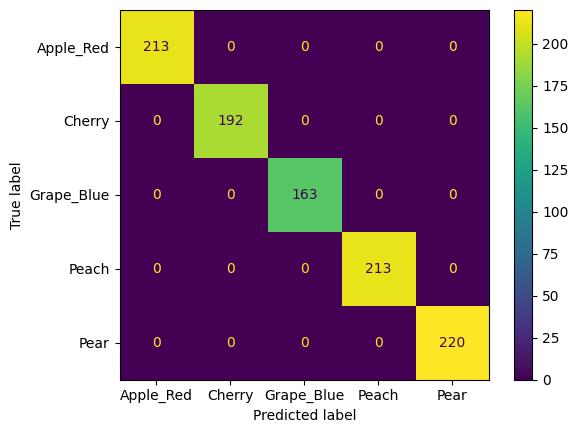

              precision    recall  f1-score   support

   Apple_Red       1.00      1.00      1.00       213
      Cherry       1.00      1.00      1.00       192
  Grape_Blue       1.00      1.00      1.00       163
       Peach       1.00      1.00      1.00       213
        Pear       1.00      1.00      1.00       220

    accuracy                           1.00      1001
   macro avg       1.00      1.00      1.00      1001
weighted avg       1.00      1.00      1.00      1001



<ipython-input-29-7ec0dabfebea>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load(f"mobilenetv3_large_100_checkpoint_fold{fold}.pt")


  0%|          | 0/126 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Fold: 1


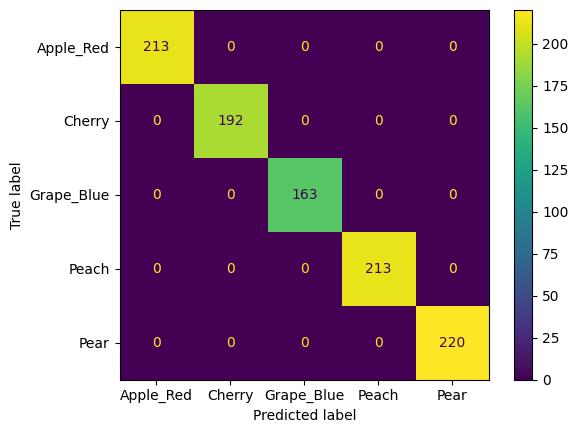

              precision    recall  f1-score   support

   Apple_Red       1.00      1.00      1.00       213
      Cherry       1.00      1.00      1.00       192
  Grape_Blue       1.00      1.00      1.00       163
       Peach       1.00      1.00      1.00       213
        Pear       1.00      1.00      1.00       220

    accuracy                           1.00      1001
   macro avg       1.00      1.00      1.00      1001
weighted avg       1.00      1.00      1.00      1001



<ipython-input-29-7ec0dabfebea>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load(f"mobilenetv3_large_100_checkpoint_fold{fold}.pt")


  0%|          | 0/126 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Fold: 2


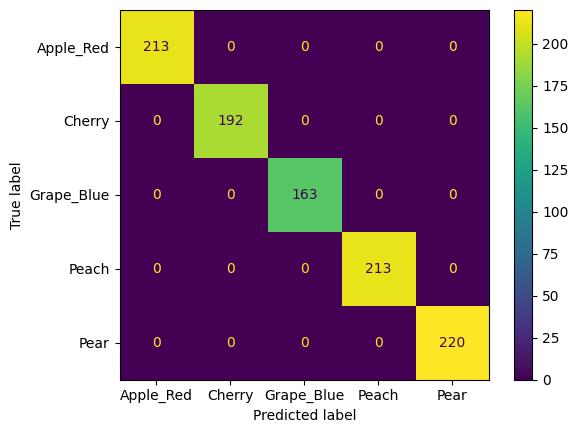

              precision    recall  f1-score   support

   Apple_Red       1.00      1.00      1.00       213
      Cherry       1.00      1.00      1.00       192
  Grape_Blue       1.00      1.00      1.00       163
       Peach       1.00      1.00      1.00       213
        Pear       1.00      1.00      1.00       220

    accuracy                           1.00      1001
   macro avg       1.00      1.00      1.00      1001
weighted avg       1.00      1.00      1.00      1001



<ipython-input-29-7ec0dabfebea>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load(f"mobilenetv3_large_100_checkpoint_fold{fold}.pt")


  0%|          | 0/126 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Fold: 3


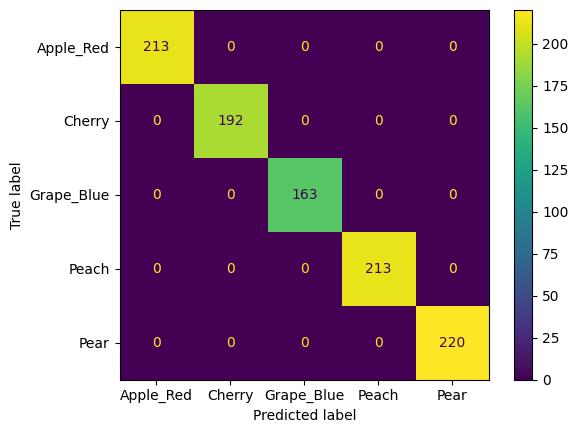

              precision    recall  f1-score   support

   Apple_Red       1.00      1.00      1.00       213
      Cherry       1.00      1.00      1.00       192
  Grape_Blue       1.00      1.00      1.00       163
       Peach       1.00      1.00      1.00       213
        Pear       1.00      1.00      1.00       220

    accuracy                           1.00      1001
   macro avg       1.00      1.00      1.00      1001
weighted avg       1.00      1.00      1.00      1001



<ipython-input-29-7ec0dabfebea>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load(f"mobilenetv3_large_100_checkpoint_fold{fold}.pt")


  0%|          | 0/126 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Fold: 4


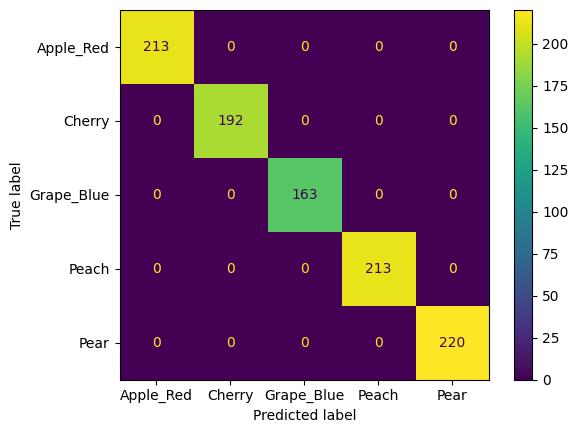

              precision    recall  f1-score   support

   Apple_Red       1.00      1.00      1.00       213
      Cherry       1.00      1.00      1.00       192
  Grape_Blue       1.00      1.00      1.00       163
       Peach       1.00      1.00      1.00       213
        Pear       1.00      1.00      1.00       220

    accuracy                           1.00      1001
   macro avg       1.00      1.00      1.00      1001
weighted avg       1.00      1.00      1.00      1001



In [ ]:
for fold in range(k_splits):
    predictions = []
    references = []

    # load model
    loaded_model = torch.load(f"mobilenetv3_large_100_checkpoint_fold{fold}.pt")
    # Evaluation
    loaded_model.eval()
    with torch.no_grad():
        for batch in tqdm(val_dataloader):
            inputs, targets = batch
            outputs = loaded_model(inputs.to(device))

            # Log Values
            predictions += outputs.argmax(-1).detach().cpu().tolist()
            references += targets.tolist()

    print(f"Fold: {fold}")

    # Confusion matrix
    cm = confusion_matrix(references, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classname)
    disp.plot()
    plt.show()

    # Classification Report
    print(classification_report(references, predictions, target_names=classname))

In [ ]:
classname = dataset.classes
classname

['Apple_Red', 'Cherry', 'Grape_Blue', 'Peach', 'Pear']

###Verification by sepreate data

In [ ]:
test_folder = '/content/test'

In [ ]:
# Making Dataset
from torchvision import datasets
test_dataset = datasets.ImageFolder(root=test_folder, # target folder of images
                                  transform=transforms["test"], # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

In [ ]:
len(test_dataset)

1253

In [ ]:
# Making test dataloader
test_dataloader = DataLoader(test_dataset, batch_size=eval_batch_size, shuffle=False, num_workers=4, pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
test_dataset.classes

['Apple_Red', 'Cherry', 'Grape_Blue', 'Peach', 'Pear']

In [ ]:
len(test_dataloader)

157

<ipython-input-37-26018ac0e9af>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load(f"mobilenetv3_large_100_checkpoint_fold{fold}.pt")


  0%|          | 0/157 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Fold: 0


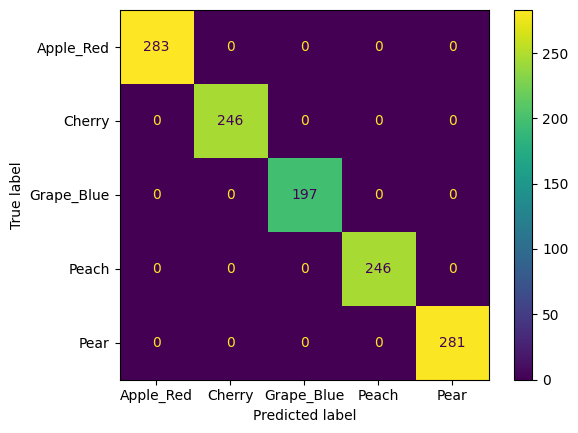

              precision    recall  f1-score   support

   Apple_Red       1.00      1.00      1.00       283
      Cherry       1.00      1.00      1.00       246
  Grape_Blue       1.00      1.00      1.00       197
       Peach       1.00      1.00      1.00       246
        Pear       1.00      1.00      1.00       281

    accuracy                           1.00      1253
   macro avg       1.00      1.00      1.00      1253
weighted avg       1.00      1.00      1.00      1253



<ipython-input-37-26018ac0e9af>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load(f"mobilenetv3_large_100_checkpoint_fold{fold}.pt")


  0%|          | 0/157 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Fold: 1


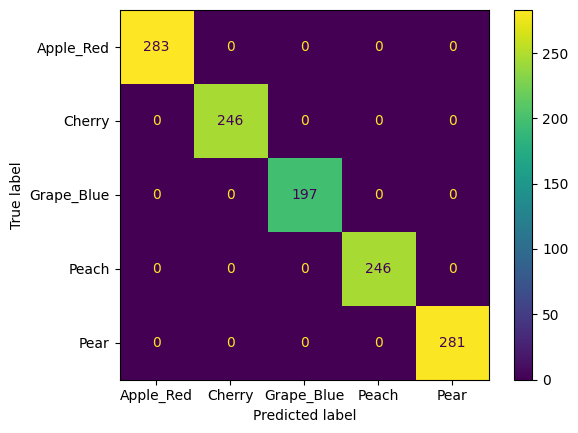

              precision    recall  f1-score   support

   Apple_Red       1.00      1.00      1.00       283
      Cherry       1.00      1.00      1.00       246
  Grape_Blue       1.00      1.00      1.00       197
       Peach       1.00      1.00      1.00       246
        Pear       1.00      1.00      1.00       281

    accuracy                           1.00      1253
   macro avg       1.00      1.00      1.00      1253
weighted avg       1.00      1.00      1.00      1253



<ipython-input-37-26018ac0e9af>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load(f"mobilenetv3_large_100_checkpoint_fold{fold}.pt")


  0%|          | 0/157 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Fold: 2


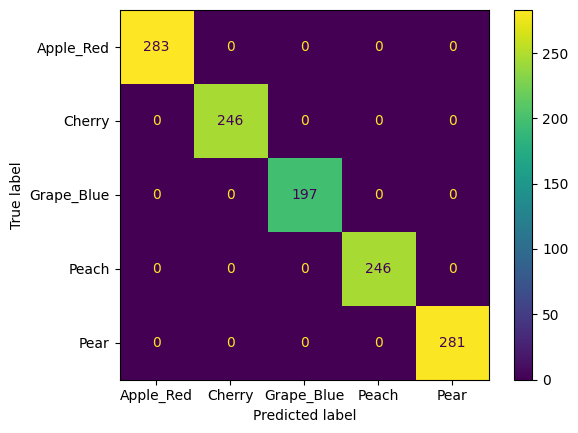

              precision    recall  f1-score   support

   Apple_Red       1.00      1.00      1.00       283
      Cherry       1.00      1.00      1.00       246
  Grape_Blue       1.00      1.00      1.00       197
       Peach       1.00      1.00      1.00       246
        Pear       1.00      1.00      1.00       281

    accuracy                           1.00      1253
   macro avg       1.00      1.00      1.00      1253
weighted avg       1.00      1.00      1.00      1253



<ipython-input-37-26018ac0e9af>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load(f"mobilenetv3_large_100_checkpoint_fold{fold}.pt")


  0%|          | 0/157 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Fold: 3


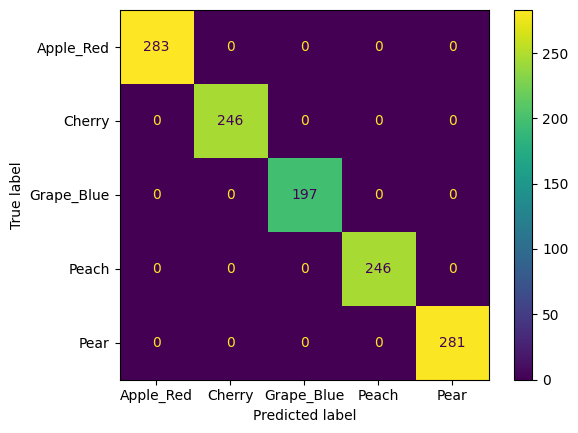

              precision    recall  f1-score   support

   Apple_Red       1.00      1.00      1.00       283
      Cherry       1.00      1.00      1.00       246
  Grape_Blue       1.00      1.00      1.00       197
       Peach       1.00      1.00      1.00       246
        Pear       1.00      1.00      1.00       281

    accuracy                           1.00      1253
   macro avg       1.00      1.00      1.00      1253
weighted avg       1.00      1.00      1.00      1253



<ipython-input-37-26018ac0e9af>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load(f"mobilenetv3_large_100_checkpoint_fold{fold}.pt")


  0%|          | 0/157 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
for fold in range(k_splits):
    predictions = []
    references = []

    # load model
    loaded_model = torch.load(f"mobilenetv3_large_100_checkpoint_fold{fold}.pt")
    # Evaluation
    loaded_model.eval()
    with torch.no_grad():
        for batch in tqdm(test_dataloader):
            inputs, targets = batch
            outputs = loaded_model(inputs.to(device))

            # Log Values
            predictions += outputs.argmax(-1).detach().cpu().tolist()
            references += targets.tolist()

    print(f"Fold: {fold}")

    # Confusion matrix
    cm = confusion_matrix(references, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classname)
    disp.plot()
    plt.show()

    # Classification Report
    print(classification_report(references, predictions, target_names=classname))

##Visualization train model result

In [ ]:
## Making Pridcition return class & prob
from typing import List, Tuple

from PIL import Image
def pred_class(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: T = None,
                        device: torch.device=device):


    # 2. Open image
    img = Image.open(image_path)

    # 3. Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    ### Predict on image ###

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

    # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 9. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    classname =  class_names[target_image_pred_label]
    prob = target_image_pred_probs.max().cpu().numpy()

    return classname , prob

In [ ]:
##Load some model
loaded_model = torch.load('/content/mobilenetv3_large_100_checkpoint_fold0.pt')

##Train data visulization

In [ ]:
#Making df for random
import os
import pandas as pd
from PIL import Image

# create an empty list to store image paths
image_paths = []

# loop through each subfolder in the "Image" directory
for root, dirs, files in os.walk('/content/test'):
    for subfolder_name in dirs:
        # get the path to the subfolder
        subfolder_path = os.path.join(root, subfolder_name)
        # loop through each file in the subfolder
        for filename in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, filename)
            image_paths.append((image_path, subfolder_name))

# create a DataFrame from the list of image paths
df = pd.DataFrame(image_paths, columns=['path', 'subfolder_name'])


In [ ]:
df.head()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image



def sample_picture(df=df,random_state=None):
    # Sample 20 random rows from the DataFrame
    sample_df = df.sample(20, random_state=random_state).copy()
    sample_df = sample_df.reset_index(drop=True)
    # Define the grid layout for displaying the images
    num_rows = 4
    num_cols = 5
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 12))
    fig.tight_layout(pad=5.0)

    # Iterate over the sampled rows and display the images in the grid
    for i, row in sample_df.iterrows():
        img = Image.open(row['path'])

        # Prediction
        pred_name , prob = pred_class(model=loaded_model,image_path=row['path'],
                   class_names = classname,
                   transform=transforms["test"])

        row_idx = i // num_cols
        col_idx = i % num_cols
        axs[row_idx, col_idx].imshow(img)
        axs[row_idx, col_idx].axis('on')
        axs[row_idx, col_idx].set_title(row['subfolder_name'] + ': \nPredict:' + pred_name + '\nProb:'+ str(prob.round(decimals=2)) )

        # prediction


    plt.show()

In [ ]:
sample_picture()

In [ ]:
sample_picture()

In [ ]:
sample_picture()

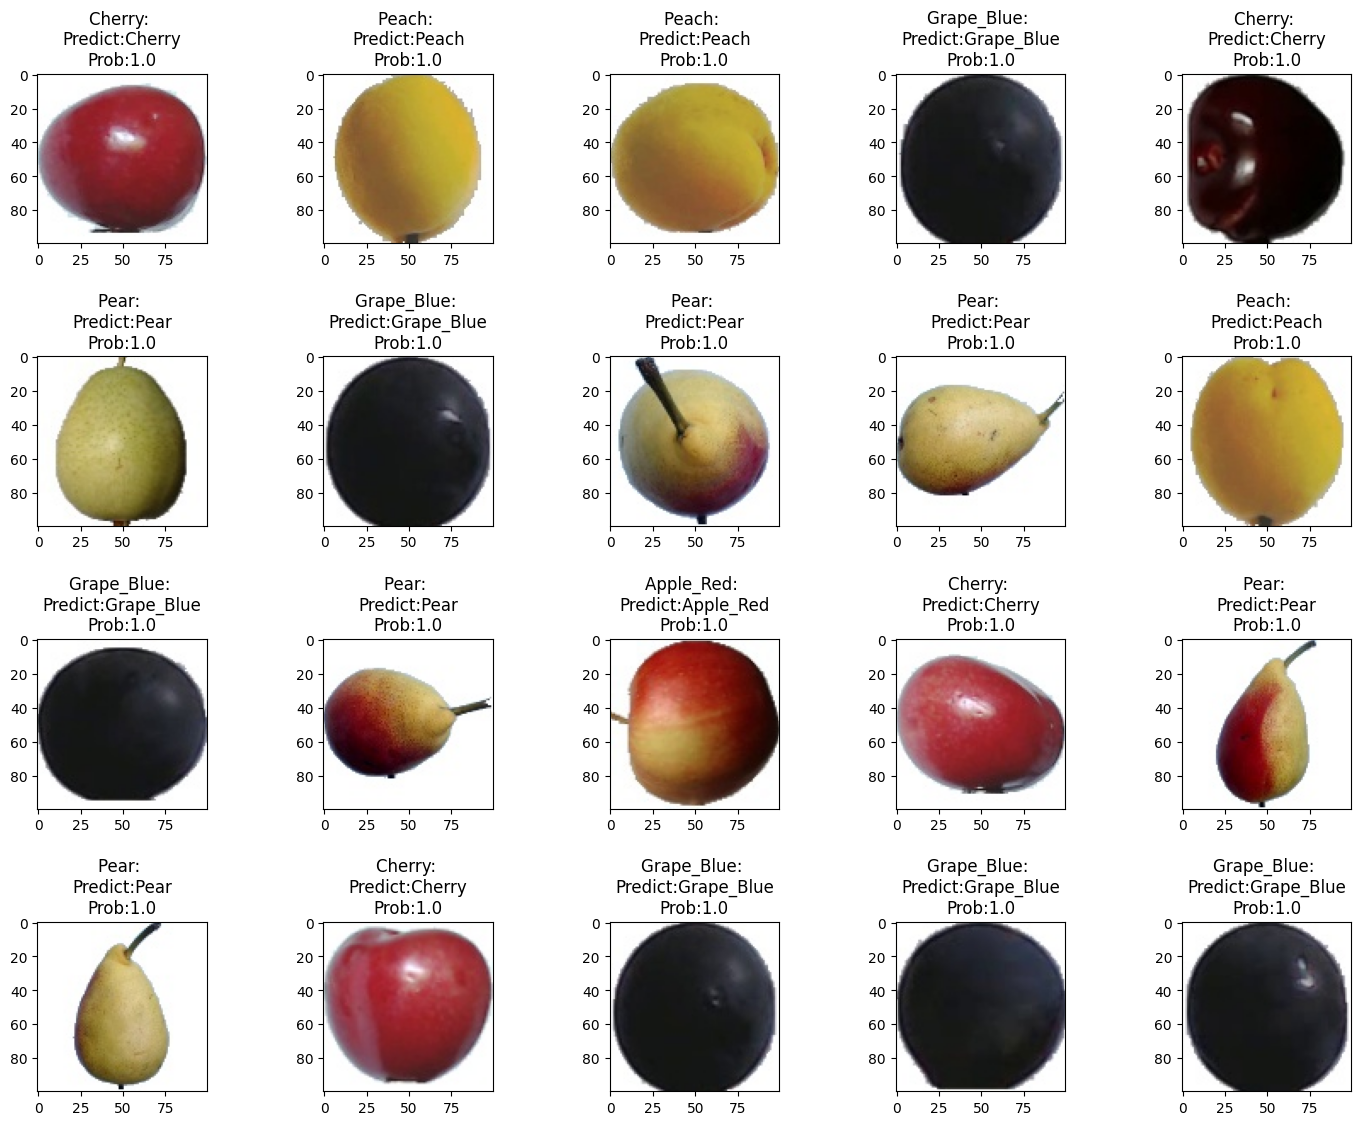

In [ ]:
sample_picture()

In [ ]:
sample_picture()

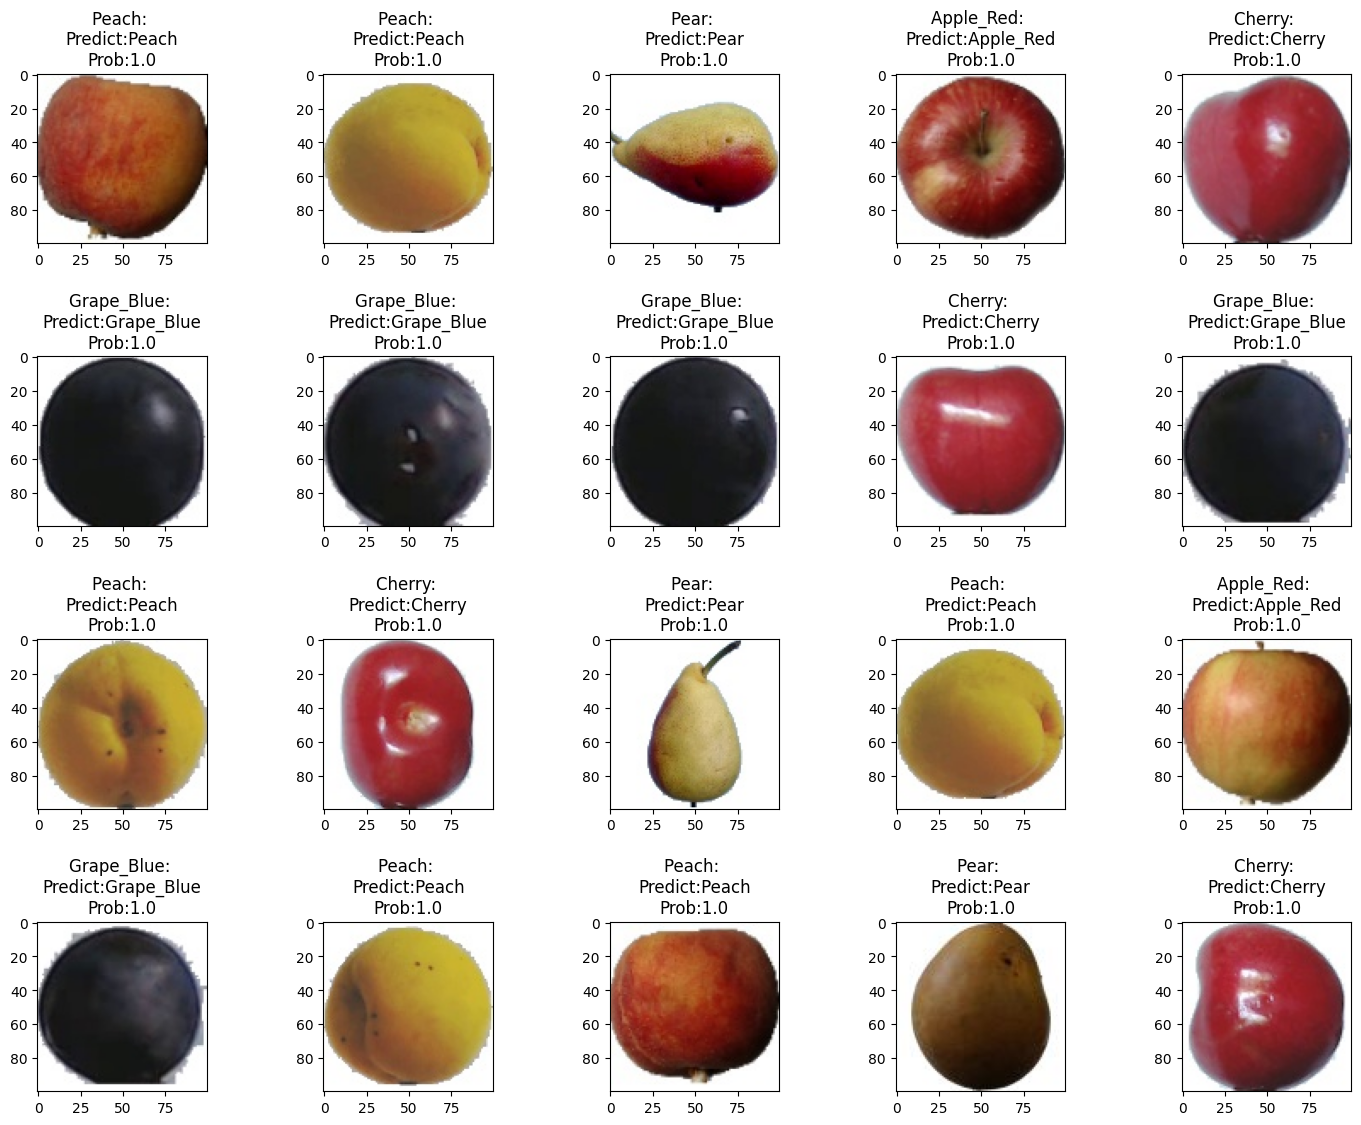

In [ ]:
sample_picture()

## Outsite data testing

In [ ]:
!wget https://universe.roboflow.com/ds/fx3tNSqjNJ?key=N4VBuJEAJf

In [ ]:
!unzip /content/fx3tNSqjNJ?key=N4VBuJEAJf

In [ ]:
import pandas as pd
train_df = pd.read_csv('/content/train/_classes.csv')

In [ ]:
#Count all value in train data set
train_df[(train_df == 1)].sum()

In [ ]:
#Sum all Sphere fiber fragment sheet sum = 1 if one class sum >1 is multiclass
train_df['Sum'] = train_df[' Apple_Red'] + train_df[' Cherry'] + train_df[' Grape_Blue'] + train_df[' Peach'] + train_df[' Pear']

In [ ]:
# Count Multiclass pictures
train_df[(train_df['Sum']> 1)].count()

In [ ]:
# Delete multiclass picture
train_df = train_df[train_df['Sum'] == 1]

In [ ]:
# Count remain
train_df[(train_df == 1)].sum()

In [ ]:
# Seperate in to dataset/Sphere , dataset/fiber, dataset/fragment, dataset/sheet,
import os
import shutil

# read the file names and classes into a pandas dataframe
df =train_df

# define the source and destination directories
src_dir = '/content/train'
dst_dir = '/content/dataset'

# loop through each row in the dataframe
for idx, row in df.iterrows():
    # get the filename and class label
    filename = row['filename']

    # check if the class label is 1
    if row[' Apple_Red'] == 1:
        # create the destination directory if it doesn't exist
        dst_subdir = os.path.join(dst_dir,'Apple_Red')
        os.makedirs(dst_subdir, exist_ok=True)

        # copy the file to the destination directory
        src_path = os.path.join(src_dir, filename)
        dst_path = os.path.join(dst_subdir, filename)
        shutil.copyfile(src_path, dst_path)
    elif row[' Cherry'] == 1:
        # create the destination directory if it doesn't exist
        dst_subdir = os.path.join(dst_dir, 'Cherry')
        os.makedirs(dst_subdir, exist_ok=True)

        # copy the file to the destination directory
        src_path = os.path.join(src_dir, filename)
        dst_path = os.path.join(dst_subdir, filename)
        shutil.copyfile(src_path, dst_path)
    elif row[' Grape_Blue'] == 1:
        # create the destination directory if it doesn't exist
        dst_subdir = os.path.join(dst_dir, 'Grape_Blue')
        os.makedirs(dst_subdir, exist_ok=True)

        # copy the file to the destination directory
        src_path = os.path.join(src_dir, filename)
        dst_path = os.path.join(dst_subdir, filename)
        shutil.copyfile(src_path, dst_path)
    elif row[' Peach'] == 1:
        # create the destination directory if it doesn't exist
        dst_subdir = os.path.join(dst_dir, 'Peach')
        os.makedirs(dst_subdir, exist_ok=True)

        # copy the file to the destination directory
        src_path = os.path.join(src_dir, filename)
        dst_path = os.path.join(dst_subdir, filename)
        shutil.copyfile(src_path, dst_path)
    elif row[' Pear'] == 1:
        # create the destination directory if it doesn't exist
        dst_subdir = os.path.join(dst_dir, 'Pear')
        os.makedirs(dst_subdir, exist_ok=True)

        # copy the file to the destination directory
        src_path = os.path.join(src_dir, filename)
        dst_path = os.path.join(dst_subdir, filename)
        shutil.copyfile(src_path, dst_path)


In [ ]:
#Making df of another for random
import os
import pandas as pd
from PIL import Image

# create an empty list to store image paths
image_paths = []

# loop through each subfolder in the "Image" directory
for root, dirs, files in os.walk('/content/dataset'):
    for subfolder_name in dirs:
        # get the path to the subfolder
        subfolder_path = os.path.join(root, subfolder_name)
        # loop through each file in the subfolder
        for filename in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, filename)
            image_paths.append((image_path, subfolder_name))

# create a DataFrame from the list of image paths
other_df = pd.DataFrame(image_paths, columns=['path', 'subfolder_name'])


In [ ]:
other_df.head()

In [ ]:
sample_picture(df=other_df)

In [ ]:
sample_picture(df=other_df)

In [ ]:
sample_picture(df=other_df)

In [ ]:
sample_picture(df=other_df)

In [ ]:
sample_picture(df=other_df)

In [ ]:
sample_picture(df=other_df)

In [ ]:
sample_picture(df=other_df)

In [ ]:
sample_picture(df=other_df)

In [ ]:
sample_picture(df=other_df)

In [ ]:
sample_picture(df=other_df)

In [ ]:
sample_picture(df=other_df)

In [ ]:
sample_picture(df=other_df)

In [ ]:
!cp /content/mobilenetv3_large_100_checkpoint_fold0.pt /content/drive/MyDrive/Datasets/Trial15_mobienetv3
!cp /content/mobilenetv3_large_100_checkpoint_fold1.pt /content/drive/MyDrive/Datasets/Trial15_mobienetv3
!cp /content/mobilenetv3_large_100_checkpoint_fold2.pt /content/drive/MyDrive/Datasets/Trial15_mobienetv3
!cp /content/mobilenetv3_large_100_checkpoint_fold3.pt /content/drive/MyDrive/Datasets/Trial15_mobienetv3
!cp /content/mobilenetv3_large_100_checkpoint_fold4.pt /content/drive/MyDrive/Datasets/Trial15_mobienetv3

In [ ]:
!nvidia-smi